# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [4]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# Continous to Discrete
"""
Your Code Here
"""
#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = pd.interval_range(start=20, end=70, periods=11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = bin_cut) 

print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(38.18181818181819, 42.727272727272734]     39155
(33.63636363636364, 38.18181818181819]      37238
(29.090909090909093, 33.63636363636364]     35954
(42.727272727272734, 47.27272727272727]     34796
(51.81818181818182, 56.36363636363637]      32025
(47.27272727272727, 51.81818181818182]      30586
(56.36363636363637, 60.909090909090914]     29832
(24.545454545454547, 29.090909090909093]    27723
(60.909090909090914, 65.45454545454547]     23291
(20.0, 24.545454545454547]                  10324
(65.45454545454547, 70.0]                    6587
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(24.545454545454547, 29.090909090909093]"
1,0,16765,45.931507,"(42.727272727272734, 47.27272727272727]"
2,0,19046,52.180822,"(51.81818181818182, 56.36363636363637]"
3,0,19005,52.068493,"(51.81818181818182, 56.36363636363637]"
4,0,19932,54.608219,"(51.81818181818182, 56.36363636363637]"


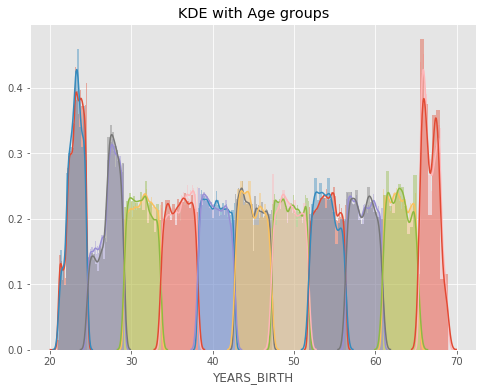

In [26]:
"""
Your Code Here
"""
year_group_sorted = bin_cut

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [8]:
for bin in bin_cut:
    sns.kdeplot(age_data.loc[(age_data['YEARS_BINNED'] == bin) & (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = bin)
    sns.kdeplot(age_data.loc[(age_data['YEARS_BINNED'] == bin) & (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = bin)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(24.545454545454547, 29.090909090909093]"
1,0,16765,45.931507,"(42.727272727272734, 47.27272727272727]"
2,0,19046,52.180822,"(51.81818181818182, 56.36363636363637]"
3,0,19005,52.068493,"(51.81818181818182, 56.36363636363637]"
5,0,16941,46.413699,"(42.727272727272734, 47.27272727272727]"
6,0,13778,37.747945,"(33.63636363636364, 38.18181818181819]"
7,0,18850,51.643836,"(47.27272727272727, 51.81818181818182]"
9,0,14469,39.641096,"(38.18181818181819, 42.727272727272734]"
10,0,10197,27.936986,"(24.545454545454547, 29.090909090909093]"
12,0,13439,36.819178,"(33.63636363636364, 38.18181818181819]"


In [7]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 24.545454545454547]",0.125533,8441.910403,23.128522
"(24.545454545454547, 29.090909090909093]",0.110883,9922.569852,27.185123
"(29.090909090909093, 33.63636363636364]",0.105412,11452.464955,31.376616
"(33.63636363636364, 38.18181818181819]",0.094688,13134.523068,35.984995
"(38.18181818181819, 42.727272727272734]",0.081394,14754.175278,40.422398
"(42.727272727272734, 47.27272727272727]",0.076589,16400.977411,44.934185
"(47.27272727272727, 51.81818181818182]",0.071896,18074.292094,49.518608
"(51.81818181818182, 56.36363636363637]",0.063107,19740.133021,54.082556
"(56.36363636363637, 60.909090909090914]",0.053701,21389.693517,58.601900


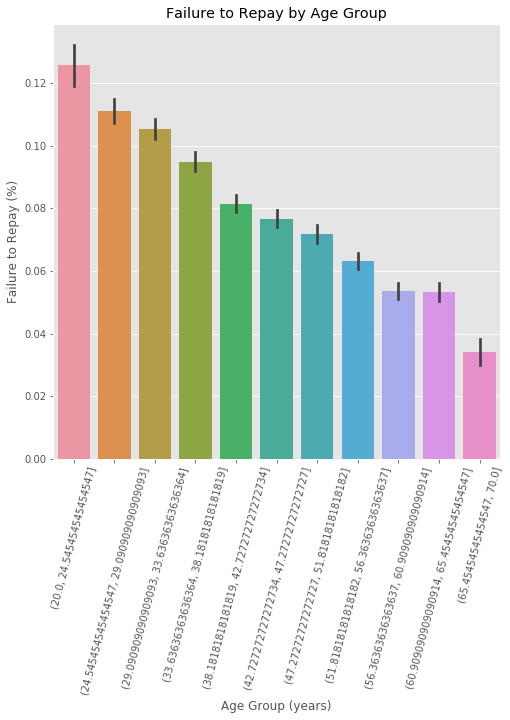

In [6]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');